In [1]:
import pandas as pd
import numpy
import sqlite3
import os
import time
import matplotlib.pyplot as plt
import numpy as np

Hello and welcome to my breakdown of the 2018 new coder survey hosted by Free Code Camp.

Please see below the process of cleaning the data and providing demographics of respondents.

At the end there is a business case in which we try to find the best markets to expand marketing efforts too.

In [4]:
Raw_Survey = pd.read_csv("2018-new-coder-survey-master/raw_data/2018_new_coder_survey.csv") #will run as long as the original folder is in the same area as your main directory.


In [5]:
Raw_Survey.columns

Index(['#', 'Are you already working as a software developer?',
       'Is this your first software development job?',
       'Before you got this job, how many months did you spend looking for a job?',
       'Would you prefer to...', 'Full-Stack Web Developer',
       'Back-End Web Developer', 'Front-End Web Developer', 'Mobile Developer',
       'DevOps / SysAdmin',
       ...
       'Which field do you work in?',
       'About how much money did you make last year (in US dollars)?',
       'About how many minutes does it take you to get to work each day?',
       'Do you consider yourself under-employed?',
       'Have you served in your country's military before?',
       'Do you receive disability benefits from your government?',
       'Do you have high speed internet at your home?', 'Start Date (UTC)',
       'Submit Date (UTC)', 'Network ID'],
      dtype='object', length=129)

In [6]:
#There are some entries with no answers, such as the 2nd row in the dataset. We will remove these rows now.
Raw_Survey['Not_Empty'] = Raw_Survey[["freeCodeCamp", "Is this your first software development job?", "Before you got this job, how many months did you spend looking for a job?", "Would you prefer to...", "Full-Stack Web Developer", "Back-End Web Developer", "Front-End Web Developer", "Mobile Developer", "DevOps / SysAdmin", "Data Scientist", "Teacher / Trainer / Developer Evangelist", "Quality Assurance Engineer", "User Experience Designer", "Product Manager", "Game Developer", "Information Security", "Data Engineer", "Other", "When do you plan to start applying for developer jobs?", "About how much money do you expect to earn per year at your first developer job (in US Dollars)?", "Would you prefer to work...", "Are you willing to relocate for a job?", "What is your biggest reason for learning to code?", "freeCodeCamp", "Mozilla Developer Network (MDN)", "Stack Overflow", "EdX", "Coursera", "Khan Academy", "Pluralsight", "Codecademy", "Udacity", "Udemy", "Code Wars", "Treehouse", "HackerRank", "Front End Masters", "Lynda.com", "Egghead.io", "CSS Tricks", "hackathons", "conferences", "workshops", "Startup Weekend", "NodeSchool", "Women Who Code", "Girl Develop It", "CoderDojo", "Meetup.com events", "RailsBridge", "Game Jam", "Rails Girls", "Django Girls", "weekend bootcamps", "The freeCodeCamp Podcast", "Code Newbie", "The Changelog", "Software Engineering Daily", "JavaScript Jabber", "Syntax.fm", "Learn To Code With Me", "Full Stack Radio", "Front End Happy Hour", "Coding Blocks", "Shop Talk Show", "Developer Tea", "Programming Throwdown", "Geek Speak", "Hanselminutes", "Talk Python To Me", "Ruby Rogues", "CodePen Radio", "Software Engineering Radio", "MIT Open Courseware", "freeCodeCamp's YouTube channel", "Computerphile", "DevTips", "CS Dojo", "Engineered Truth", "LearnCode.Academy", "LevelUpTuts", "Fun Fun Function", "Coding Tutorials 360", "Coding Train", "Derek Banas", "Simplilearn", "Simple Programmer (Bulldog Mindset)", "Mozilla Hacks", "Google Developers", "About how many hours do you spend learning each week?", "About how many months have you been programming for?", "Have you attended a full-time coding bootcamp?", "Which one?", "Have you finished yet?", "Did you take out a loan to pay for the bootcamp?", "Based on your experience, would you recommend this bootcamp to your friends?", "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", "How old are you?", "What's your gender?", "Which country are you a citizen of?", "Which country do you currently live in?", "About how many people live in your city?", "Are you an ethnic minority in your country?", "Which language do you you speak at home with your family?", "What's the highest degree or level of school you have completed?", "What was the main subject you studied in university?", "What's your marital status?", "Do you financially support any dependents?", "Do you have children?", "How many children do you have?", "Do you financially support any elderly relatives or relatives with disabilities?", "Do you have any debt?", "Do you have a home mortgage?", "About how much do you owe on your home mortgage (in US Dollars)?", "Do you have student loan debt?", "About how much do you owe in student loans (in US Dollars)?", "Regarding employment status, are you currently...", "Other", "Which field do you work in?", "About how much money did you make last year (in US dollars)?", "About how many minutes does it take you to get to work each day?", "Do you consider yourself under-employed?", "Have you served in your country's military before?", "Do you receive disability benefits from your government?", "Do you have high speed internet at your home?"]].any(axis=1).astype(int)
Raw_Survey = Raw_Survey[Raw_Survey['Not_Empty']==1]

In [7]:
Raw_Survey['Gave_Job_Preference'] = Raw_Survey[['Full-Stack Web Developer', 'Back-End Web Developer', 'Front-End Web Developer', 'Mobile Developer', 'DevOps / SysAdmin', 'Data Scientist', 'Teacher / Trainer / Developer Evangelist', 'Quality Assurance Engineer', 'User Experience Designer', 'Product Manager', 'Game Developer', 'Information Security', 'Data Engineer']].any(axis=1).astype(int)


Raw_Survey['services_used'] = Raw_Survey[["freeCodeCamp", "Mozilla Developer Network (MDN)", "Stack Overflow", "EdX", "Coursera", "Khan Academy", "Pluralsight", "Codecademy", "Udacity", "Udemy", "Code Wars", "Treehouse", "HackerRank", "Front End Masters", "Lynda.com", "Egghead.io", "CSS Tricks"]].sum(axis=1).astype(int)


Raw_Survey['watches_podcasts'] = Raw_Survey[["The freeCodeCamp Podcast", "Code Newbie", "The Changelog", "Software Engineering Daily", "JavaScript Jabber", "Syntax.fm", "Learn To Code With Me", "Full Stack Radio", "Front End Happy Hour", "Coding Blocks", "Shop Talk Show", "Developer Tea", "Programming Throwdown", "Geek Speak", "Hanselminutes", "Talk Python To Me", "Ruby Rogues", "CodePen Radio", "Software Engineering Radio", "MIT Open Courseware"]].any(axis=1).astype(int)
Raw_Survey['watches_podcasts'] = np.where(Raw_Survey['watches_podcasts'] == 1, 'podcasts', '')

Raw_Survey['watches_youtube'] = Raw_Survey[["freeCodeCamp's YouTube channel", "Computerphile", "DevTips", "CS Dojo", "Engineered Truth", "LearnCode.Academy", "LevelUpTuts", "Fun Fun Function", "Coding Tutorials 360", "Coding Train", "Derek Banas", "Simplilearn", "Simple Programmer (Bulldog Mindset)", "Mozilla Hacks", "Google Developers"]].any(axis=1).astype(int)
Raw_Survey['watches_youtube'] = np.where(Raw_Survey['watches_podcasts'] == 1, 'youtube', '')


C:\Users\jorda\AppData\Local\Temp\ipykernel_17416\2389815184.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Raw_Survey['services_used'] = Raw_Survey[["freeCodeCamp", "Mozilla Developer Network (MDN)", "Stack Overflow", "EdX", "Coursera", "Khan Academy", "Pluralsight", "Codecademy", "Udacity", "Udemy", "Code Wars", "Treehouse", "HackerRank", "Front End Masters", "Lynda.com", "Egghead.io", "CSS Tricks"]].sum(axis=1).astype(int)


0.9726910981323407 percent of respondents gave an answer


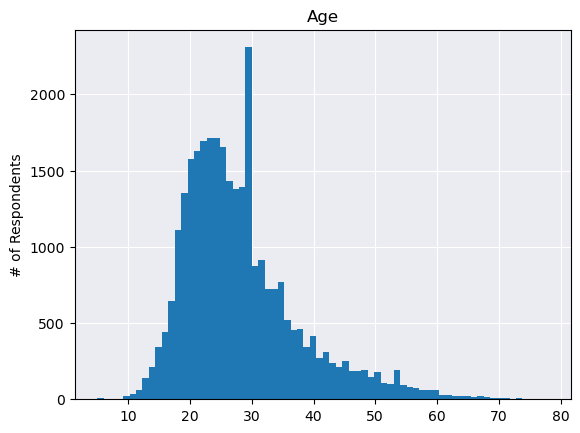

In [8]:
column_name = "How old are you?"

Raw_Survey_age = Raw_Survey.dropna(subset=["How old are you?"])
Raw_Survey_age = Raw_Survey_age[Raw_Survey_age["How old are you?"]<80]

#value_counts = Raw_Survey_age[column_name].value_counts()

fig, ax = plt.subplots()
Raw_Survey_age[column_name].plot.hist(ax=ax, zorder=2, bins=70)
#value_counts.plot(kind='hist', ax=ax, zorder=2)

ax.grid(zorder=1)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))

plt.ylabel('# of Respondents')
plt.title('Age')

print(f'{len(Raw_Survey_age)/len(Raw_Survey)} percent of respondents gave an answer')
plt.show()

0.9743277068224119 percent of respondents gave an answer


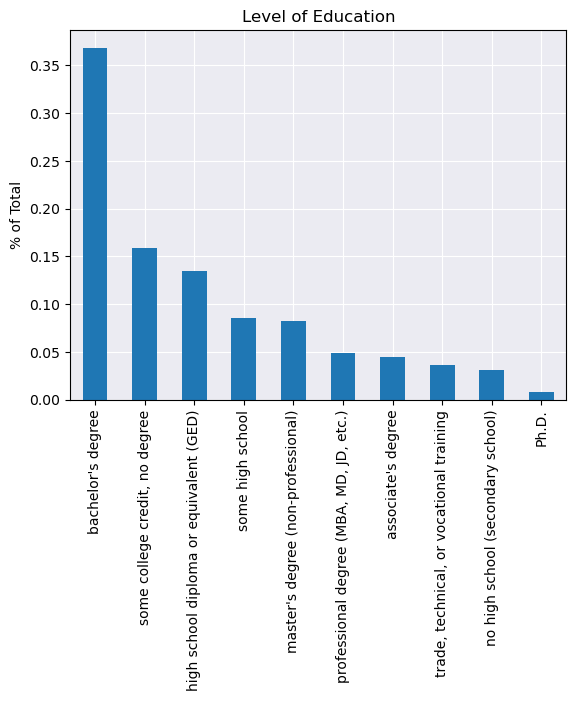

bachelor's degree                           0.368487
some college credit, no degree              0.158685
high school diploma or equivalent (GED)     0.134675
some high school                            0.085600
master's degree (non-professional)          0.082076
professional degree (MBA, MD, JD, etc.)     0.049272
associate's degree                          0.044990
trade, technical, or vocational training    0.036691
no high school (secondary school)           0.031256
Ph.D.                                       0.008267
Name: What's the highest degree or level of school you have completed?, dtype: float64

In [27]:
column_name = "What's the highest degree or level of school you have completed?"

Raw_Survey_education = Raw_Survey.dropna(subset=["What's the highest degree or level of school you have completed?"])

value_counts = Raw_Survey_education[column_name].value_counts()/len(Raw_Survey_education)

fig, ax = plt.subplots()
value_counts.plot(kind='bar', ax=ax, zorder=2)

ax.grid(zorder=1)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))

plt.ylabel('% of Total')
plt.title('Level of Education')

print(f'{len(Raw_Survey_education)/len(Raw_Survey)} percent of respondents gave an answer')
plt.show()

value_counts

In [ ]:
column_name = "Would you prefer to..."

Raw_Survey_company_type = Raw_Survey.dropna(subset=["Would you prefer to..."])


value_counts = Raw_Survey_company_type[column_name].value_counts()/len(Raw_Survey_company_type)

fig, ax = plt.subplots()
value_counts.plot(kind='bar', ax=ax, zorder=2)

ax.grid(zorder=1)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))

plt.ylabel('% of Total')
plt.title('Prefered Company Size')

print(f'{len(Raw_Survey_company_type)/len(Raw_Survey)} percent of respondents gave an answer')
plt.show()

In [ ]:
column_name = "Would you prefer to work..."

Raw_Survey_work_conditions = Raw_Survey.dropna(subset=["Would you prefer to work..."])


value_counts = Raw_Survey_work_conditions[column_name].value_counts()/len(Raw_Survey_work_conditions)

fig, ax = plt.subplots()
value_counts.plot(kind='bar', ax=ax, zorder=2)

ax.grid(zorder=1)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))

plt.ylabel('% of Total')
plt.title('Prefered Work Conditions')

print(f'{len(Raw_Survey_work_conditions)/len(Raw_Survey)} percent of respondents gave an answer')
plt.show()

In [ ]:
market_share = ["freeCodeCamp", "Mozilla Developer Network (MDN)", "Stack Overflow", "EdX", "Coursera", "Khan Academy", "Pluralsight", "Codecademy", "Udacity", "Udemy", "Code Wars", "Treehouse", "HackerRank", "Front End Masters", "Lynda.com", "Egghead.io", "CSS Tricks"]

Raw_Survey['market_share_check'] = Raw_Survey[market_share].any(axis=1).astype(int)
Raw_Survey_answered_marketshare = Raw_Survey[Raw_Survey['market_share_check']==1]

combined_counts = pd.concat([Raw_Survey_answered_marketshare[column].value_counts() for column in market_share])/len(Raw_Survey_answered_marketshare)
combined_counts = combined_counts.sort_values(ascending=False)

fig, ax = plt.subplots()
combined_counts.plot(kind='bar', ax=ax, zorder=2)

ax.grid(zorder=1)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))

plt.ylabel('% of Respondents that use')
plt.title('What Services are popular among respondents?')

print(f'{len(Raw_Survey_answered_marketshare)/len(Raw_Survey)} percent of respondents gave an answer')
plt.show()


In [ ]:
prefered_titles = ['Full-Stack Web Developer', 'Back-End Web Developer', 'Front-End Web Developer', 'Mobile Developer', 'DevOps / SysAdmin', 'Data Scientist', 'Teacher / Trainer / Developer Evangelist', 'Quality Assurance Engineer', 'User Experience Designer', 'Product Manager', 'Game Developer', 'Information Security', 'Data Engineer']

Raw_Survey['job_title_check'] = Raw_Survey[prefered_titles].any(axis=1).astype(int)
Raw_Survey_answered_job_title = Raw_Survey[Raw_Survey['job_title_check']==1]

combined_counts = pd.concat([Raw_Survey_answered_job_title[column].value_counts() for column in prefered_titles])/len(Raw_Survey_answered_job_title)
combined_counts = combined_counts.sort_values(ascending=False)

fig, ax = plt.subplots()
combined_counts.plot(kind='bar', ax=ax, zorder=2)

ax.grid(zorder=1)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))

plt.ylabel('% of Respondents that are interested in')
plt.title('Respondents are interested in these positions')

print(f'{len(Raw_Survey_answered_job_title)/len(Raw_Survey)} percent of respondents gave an answer')
plt.show()

Business Case:

We are tasked with finding which three countries to market towards. Currently the company is based heavily in the United States.

The Company provides an E-Learning product for a paid subscription that includes recorded classes with online exams and projects that students can go through at their own pace.

0.9648289583467043 percent of respondents gave an answer


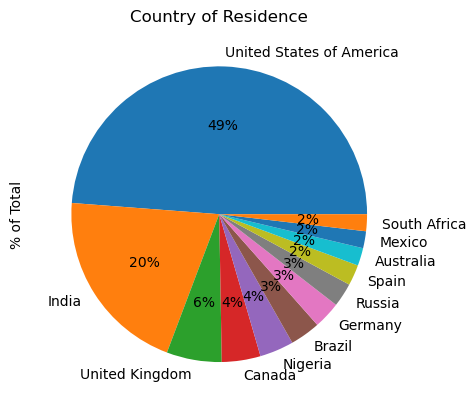

In [11]:
column_name = "Which country do you currently live in?"

Raw_Survey_residence = Raw_Survey.dropna(subset=["Which country do you currently live in?"])

value_counts = Raw_Survey_residence[column_name].value_counts()/len(Raw_Survey_residence) #convert values to a % of total respondents.
top_10_values = value_counts.nlargest(12) #there are too many countries to fit in one graphic)

top_10_values.plot(kind='pie', autopct='%1.f%%') #pie chart and round to nearest 1%

plt.ylabel('% of Total')
plt.title('Country of Residence')

print(f'{len(Raw_Survey_residence)/len(Raw_Survey)} percent of respondents gave an answer')
plt.show()

In [12]:
# to calculate the average monthly spending of a resident from the 6 countries with the largest marketshare, we must keep only responces where an amount spent on e learning was given.

# seeing as the company provides only lessons, we should remove respondents who participated in a bootcamp, as they are expensive and will distort our results, and will not be offered by our company.

# we should also look for outliers after these adjustments.

# we will then use the market share as well as average expenditure per month to determine the largest markets for us to begin marketing too.

In [13]:


Raw_Survey_spending = Raw_Survey.dropna(subset=["Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"])

Raw_Survey_spending = Raw_Survey_spending[Raw_Survey_spending["Have you attended a full-time coding bootcamp?"]==0]

Raw_Survey_spending = Raw_Survey_spending[Raw_Survey_spending["Which country do you currently live in?"].isin(['United States of America', 'India', 'Canada', 'United Kingdom', 'Nigeria', 'Brazil'])]

Raw_Survey_spending['About how many months have you been programming for?'].replace(0,1, inplace = True)
Raw_Survey_spending['Monthly Spending'] = Raw_Survey_spending['Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?']/Raw_Survey_spending['About how many months have you been programming for?']

Raw_Survey_spending = Raw_Survey_spending[Raw_Survey_spending['Monthly Spending']>0] # remove respondents who did not reply with any answer
Raw_Survey_spending = Raw_Survey_spending[Raw_Survey_spending['About how many months have you been programming for?']>0] # remove users who did not reply to this question.
Raw_Survey_spending['About how many months have you been programming for?'].replace(0,1, inplace = True)
Raw_Survey_spending = Raw_Survey_spending[Raw_Survey_spending['Have you attended a full-time coding bootcamp?']!=1] # remove these respondents who will report high spending but likely for a bootcamp which will not be a provided service.


Text(0, 0.5, 'Monthy Spending')

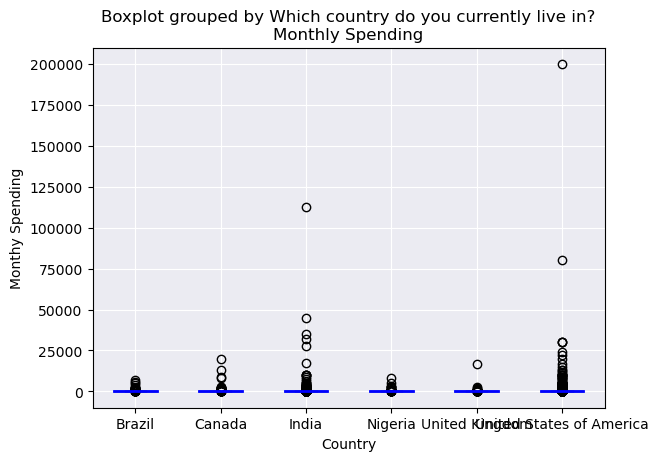

In [14]:
medianprops = dict(linestyle='-', linewidth=2, color='b')

fig, ax = plt.subplots()
Raw_Survey_spending.boxplot(column='Monthly Spending', by="Which country do you currently live in?", ax=ax, zorder=2, medianprops=medianprops)

ax.grid(zorder=1)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))


plt.xlabel('Country')
plt.ylabel('Monthy Spending')


In [15]:
countries_mean = Raw_Survey_spending[["Which country do you currently live in?", 'Monthly Spending']]
countries_mean = countries_mean.groupby("Which country do you currently live in?").agg(['mean', 'std'])
countries_mean

# usually values more than 3 SD's from the mean account for 0.013% of a population. Values in our dataset that are a whole 4 SD's away from the mean are likely not descriptive of the actual population. 
# I would say these respondents missread the question and included their university tuition.

Monthly Spending             
                                                    mean          std
Which country do you currently live in?                              
Brazil                                        168.336177   664.681404
Canada                                        295.185137  1468.746855
India                                         318.178758  3397.288539
Nigeria                                       163.884063   620.764232
United Kingdom                                110.392409   785.189769
United States of America                      317.565225  3742.963814

0.2204929080290097 percent of respondents gave an answer


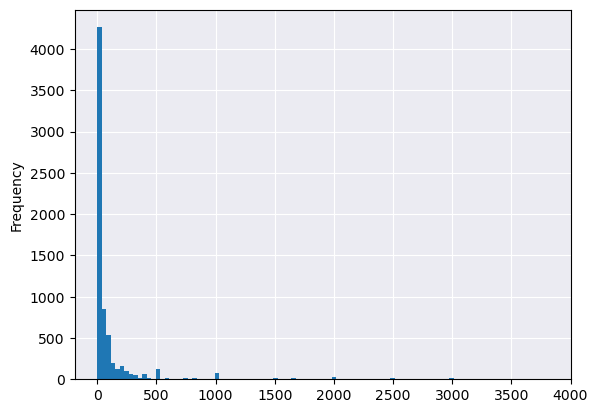

In [16]:
fig, ax = plt.subplots()

#HEavy doubt that anyone spends over 4000 USD a month on online llearning only. I will remove those who spend more than this then manually analyze the outliers who spend from 1000-4000.
Raw_Survey_spending_hist = Raw_Survey_spending
Raw_Survey_spending_hist = Raw_Survey_spending[Raw_Survey_spending['Monthly Spending']<4000]
Raw_Survey_spending_hist['Monthly Spending'].plot.hist(ax=ax, zorder=2, bins=100)

ax.grid(zorder=1)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))

print(f'{len(Raw_Survey_spending_hist)/len(Raw_Survey)} percent of respondents gave an answer')
plt.show()

In [17]:
countries_mean = Raw_Survey_spending_hist[["Which country do you currently live in?", 'Monthly Spending']]
countries_mean = countries_mean.groupby("Which country do you currently live in?").agg(['mean', 'std'])
countries_mean['upper_bound'] = countries_mean['Monthly Spending', 'mean'] + (3*countries_mean['Monthly Spending',  'std'])
countries_mean

# We can already see more realistic numbers, however overall spending seems very high.

Monthly Spending              \
                                                    mean         std   
Which country do you currently live in?                                
Brazil                                        117.411375  383.107331   
Canada                                        150.843963  359.647783   
India                                          96.886350  309.169085   
Nigeria                                       127.351576  363.729795   
United Kingdom                                 75.971880  213.441332   
United States of America                      126.355630  328.155014   

                                         upper_bound  
                                                      
Which country do you currently live in?               
Brazil                                   1266.733369  
Canada                                   1229.787311  
India                                    1024.393605  
Nigeria                                  1218.540962  
United Kingdom                            716.295876  
United States of America                 1110.820672

In [18]:
check = Raw_Survey_spending_hist[Raw_Survey_spending_hist['Monthly Spending']>400] #checking students paying more than 4800 USD a year on e learning.

check = check[["Have you attended a full-time coding bootcamp?","About how many months have you been programming for?","Which country do you currently live in?",'Monthly Spending',"What's the highest degree or level of school you have completed?","What was the main subject you studied in university?"]]
check = check.dropna(subset=["What's the highest degree or level of school you have completed?"])
check



,Have you attended a full-time coding bootcamp?,About how many months have you been programming for?,Which country do you currently live in?,Monthly Spending,What's the highest degree or level of school you have completed?,What was the main subject you studied in university?
21,0.0,12.0,Nigeria,416.666667,bachelor's degree,Computer Science
25,0.0,9.0,United Kingdom,555.555556,bachelor's degree,Computer Science
48,0.0,2.0,United States of America,1000.000000,bachelor's degree,Public Health
204,0.0,22.0,United States of America,763.636364,bachelor's degree,Political Science and Government
211,0.0,5.0,United States of America,1800.000000,bachelor's degree,Business Administration
...,...,...,...,...,...,...
30847,0.0,1.0,United States of America,3000.000000,bachelor's degree,Education
30912,0.0,3.0,Nigeria,1666.666667,bachelor's degree,Economics
31076,0.0,3.0,United States of America,1233.333333,bachelor's degree,Clinical Psychology
31103,0.0,1.0,United Kingdom,500.000000,master's degree (non-professional),Information Systems


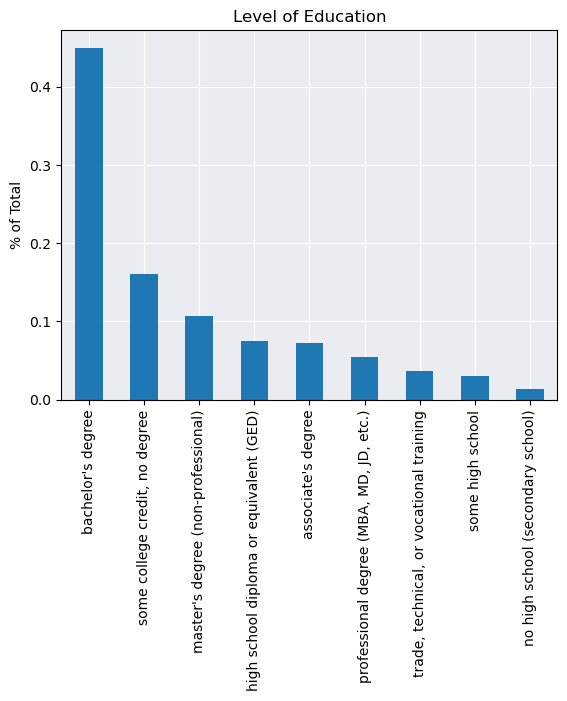

In [19]:
column_name = "What's the highest degree or level of school you have completed?"

check = check.dropna(subset=["What's the highest degree or level of school you have completed?"])

value_counts = check[column_name].value_counts()/len(check)

fig, ax = plt.subplots()
value_counts.plot(kind='bar', ax=ax, zorder=2)

ax.grid(zorder=1)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))

plt.ylabel('% of Total')
plt.title('Level of Education')
plt.show()


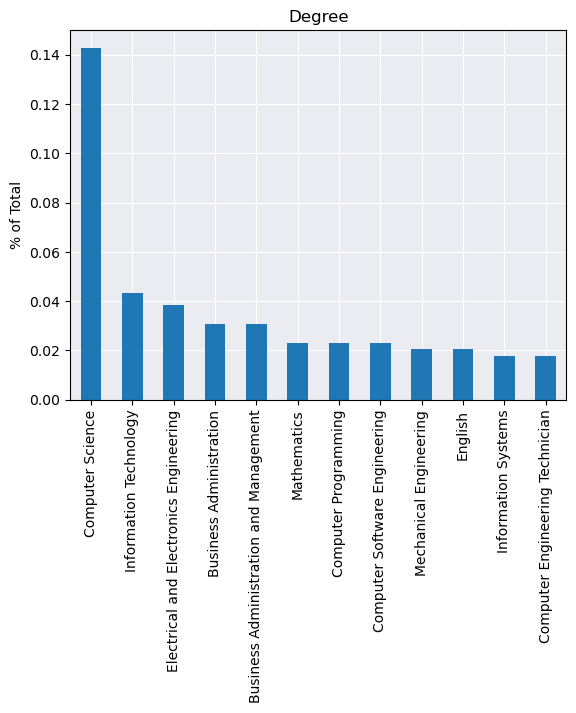

In [20]:
column_name = "What was the main subject you studied in university?"

degree = check.dropna(subset=["What was the main subject you studied in university?"])


value_counts = degree[column_name].value_counts()
top_10_values = value_counts.nlargest(12)/len(degree) #there are too many countries to fit in one graphic)

fig, ax = plt.subplots()
top_10_values.plot(kind='bar', ax=ax, zorder=2)

ax.grid(zorder=1)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))

plt.ylabel('% of Total')
plt.title('Degree')
plt.show()


In [21]:
# from the above two graphs, we can see some patterns with respondents who reported paying over 400$ a month on e learning

# While the entire population of respondents had 25% of people with highschool education or less, the group with high spending has only 11.5% of repondents with highschool or less level of education.

# For the high spending group, all the most common degrees are related to business intelligence, programing, or math/statistics, which all lean heavily into programing.

# based on the above reasons, I believe this group of people missread the question and included their tuition costs. Moving forward we will exclude this group of individuals.

In [22]:
Raw_Survey_spending = Raw_Survey_spending[Raw_Survey_spending['Monthly Spending']<400]

countries_mean = Raw_Survey_spending[["Which country do you currently live in?", 'Monthly Spending']]
countries_mean = countries_mean.groupby("Which country do you currently live in?").agg(['mean', 'std'])
countries_mean

Monthly Spending           
                                                    mean        std
Which country do you currently live in?                            
Brazil                                         35.203008  58.546361
Canada                                         50.463489  72.339887
India                                          36.508152  60.445508
Nigeria                                        46.596823  64.510818
United Kingdom                                 38.400453  61.291649
United States of America                       52.663328  72.048214

In [23]:
# this data looks much more realistic. We have reasonable variance.
# we also start to see the expenditure per month match what we expect for most countries based on their countried GDP per capita.
# it is expected that people in Canada and USA would be the largest spenders.

# now that we are confident in our expenditure/month metric, lets group expenditure by country to see the size of the market for these countried in terms of $USD.

In [24]:
countries_mean = Raw_Survey_spending[["Which country do you currently live in?", 'Monthly Spending']]
countries_mean = countries_mean.groupby("Which country do you currently live in?").agg(['sum', 'count'])
countries_mean = countries_mean.sort_values(by=('Monthly Spending', 'sum'), ascending=False)
countries_mean

Monthly Spending      
                                                     sum count
Which country do you currently live in?                       
United States of America                   183110.391665  3477
India                                       54725.719487  1499
United Kingdom                              17625.807719   459
Nigeria                                     15237.161171   327
Canada                                      15088.583261   299
Brazil                                      11053.744482   314

In [25]:
# After the United States, The three largest countries by total monthly spending are India, United Kingdom, and Nigeria.
# I was surprised a high income country like Canada would place outside the top 4.


Thank you for exploring this data with me and identifying the largest markets!